# Simple Linear Regression With Sunthetic Data

Explore linear regression with simple database

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

#### Helper methods. Will look more into these thinks later. For now just use them :)

In [2]:
def build_module(my_learning_rate):
  model = tf.keras.models.Sequential()
  
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

def train_model(model, features, label, epochs, batch_size):
  # Train with features and labels for specified ephocs
  history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs)
  
  # Trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # List of epochs is stored separately from the rest of the history
  epochs = history.epoch

  # Gather a snapshot of each epoch
  hist = pd.DataFrame(history.history)

  # Model's root mean squared error at each epoch
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

#### Define the dataset

In [3]:
my_features = ([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0])
my_label = ([5.0, 8.8, 9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

#### Plot the dataset

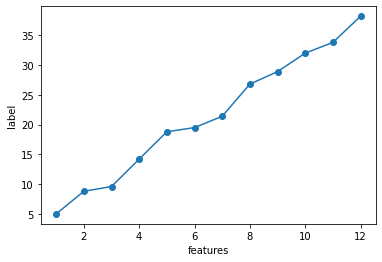

In [5]:
plt.xlabel("features")
plt.ylabel("label")

plt.scatter(my_features, my_label) # Points
plt.plot(my_features, my_label) # Line

#### Specifing hyperparameters

In [15]:
learning_rate = 0.1
epochs = 70
my_batch_size = 1

my_model = build_module(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_features, my_label, epochs, my_batch_size)

Epoch 1/70
12/12 [==============================] - 0s 333us/step - loss: 522.0451 - root_mean_squared_error: 22.8483
Epoch 2/70
12/12 [==============================] - 0s 333us/step - loss: 202.2572 - root_mean_squared_error: 14.2217
Epoch 3/70
12/12 [==============================] - 0s 334us/step - loss: 76.5504 - root_mean_squared_error: 8.7493
Epoch 4/70
12/12 [==============================] - 0s 334us/step - loss: 21.1495 - root_mean_squared_error: 4.5989
Epoch 5/70
12/12 [==============================] - 0s 334us/step - loss: 4.3018 - root_mean_squared_error: 2.0741
Epoch 6/70
12/12 [==============================] - 0s 334us/step - loss: 1.9353 - root_mean_squared_error: 1.3911
Epoch 7/70
12/12 [==============================] - 0s 334us/step - loss: 1.7770 - root_mean_squared_error: 1.3330
Epoch 8/70
12/12 [==============================] - 0s 417us/step - loss: 2.0220 - root_mean_squared_error: 1.4220
Epoch 9/70
12/12 [==============================] - 0s 333us/step - loss

#### Plot the model (represented by a red line)

c:\Users\Joaki\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


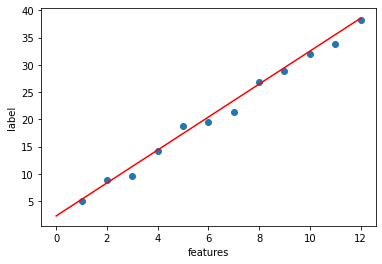

In [16]:
# Label axes
plt.xlabel("features")
plt.ylabel("label")

# Plot features vs label
plt.scatter(my_features, my_label)

# Red line representing the model
x0 = 0 # Starts at (0, 0)
y0 = trained_bias
x1 = my_features[-1]
y1 = trained_bias + (trained_weight * x1)

plt.plot([x0, x1], [y0, y1], c='r')
plt.show()

#### Plot the loss curve

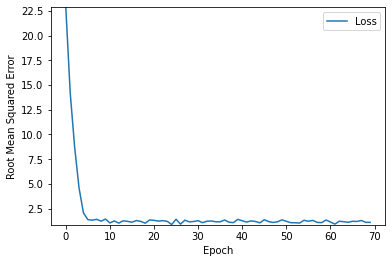

In [17]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")

plt.plot(epochs, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min()*0.97, rmse.max()])
plt.show()

## Summary - Hyperparameters

Need to find the best hyperparameters for your dataset. Some rule of thumb:

- Training loss should decrease, and not oscillates
- Increase number of epochs if the training loss does not converge
- Increase learning rate if the training loss decreases to slowly
- Decrease learning rate if training loss varies wildly (oscillates)
- Start with large batch size, then decrease until you see degration